<a href="https://colab.research.google.com/github/Aldoptma0704/Klasifikasi-Sampah/blob/main/klasifikasi_sampah_organik_dan_daur_ulang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch torchvision timm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import os
import zipfile
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import timm

from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
zip_file_path = '/content/waste clasification.zip'
extract_dir = '/content/waste clasification'

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)
        print("Ekstraksi selesai.")
else:
    print("Folder sudah ada.")

Ekstraksi selesai.


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
# Transformasi gambar
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(degrees=5, translate=(0.05, 0.05)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])
test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

In [ ]:
# Load dataset
train_dataset = datasets.ImageFolder("/content/waste clasification/DATASET/TRAIN", transform=transform)
test_dataset = datasets.ImageFolder("/content/waste clasification/DATASET/TEST", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [ ]:
# Load model ViT (pretrained dari timm)
model = timm.create_model('vit_tiny_patch16_224', pretrained=True)
model.head = nn.Linear(model.head.in_features, 2)  # 2 kelas: organic, recyclable
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/22.9M [00:00<?, ?B/s]

In [ ]:
# Loss & Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

In [ ]:
# Training loop
train_losses = []
for epoch in range(10):
    model.train()
    total_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    train_losses.append(avg_loss)
    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

Epoch 1, Loss: 0.1554
Epoch 2, Loss: 0.0997
Epoch 3, Loss: 0.0853
Epoch 4, Loss: 0.0692
Epoch 5, Loss: 0.0613
Epoch 6, Loss: 0.0527
Epoch 7, Loss: 0.0483
Epoch 8, Loss: 0.0387
Epoch 9, Loss: 0.0385
Epoch 10, Loss: 0.0408


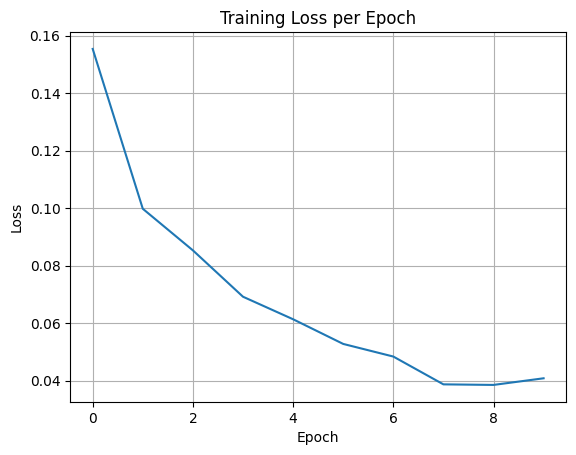

In [ ]:
# Visualisasi Loss
plt.plot(train_losses)
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

In [ ]:
# Evaluasi
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

# Hasil evaluasi
target_names = train_dataset.classes  # ['organik', 'recyclable'] (sesuai folder)
print("\n=== Classification Report ===")
print(classification_report(all_labels, all_preds, target_names=target_names))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(all_labels, all_preds))


=== Classification Report ===
              precision    recall  f1-score   support

           O       0.90      0.98      0.94      1401
           R       0.97      0.87      0.92      1112

    accuracy                           0.93      2513
   macro avg       0.94      0.92      0.93      2513
weighted avg       0.93      0.93      0.93      2513


=== Confusion Matrix ===
[[1370   31]
 [ 146  966]]


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Akurasi pada data test: {100 * correct / total:.2f}%')

Akurasi pada data test: 92.64%


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
torch.save(model.state_dict(), "vit_waste_classification_final.pth")

In [ ]:
drive_model_path = "/content/drive/MyDrive/vit_waste_classification_final.pth"
torch.save(model.state_dict(), drive_model_path)
print(f"Model saved to: {drive_model_path}")

Model saved to: /content/drive/MyDrive/vit_waste_classification_final.pth
